# **GAN with MNSIT Dataset**

[COLAB Link](https://colab.research.google.com/drive/1v3BtOO80nuhzacbqe2uDLlvjUdQYvocU#scrollTo=aaobaWcnEhwB)

This code implements a Generative Adversarial Network (GAN) using PyTorch for generating synthetic handwritten digit images based on the MNIST dataset. The GAN consists of two neural networks: a generator that generates fake images from random noise vectors, and a discriminator that tries to distinguish between real and fake images. The generator and discriminator are trained in an adversarial manner, where the generator tries to generate images that can fool the discriminator, and the discriminator tries to correctly classify real and fake images. The training process involves alternating between updating the discriminator and generator parameters using backpropagation and gradient descent optimization.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms


These lines import the necessary PyTorch modules and utilities for working with neural networks, optimization algorithms, data loaders, and datasets.

In [ ]:
# Hyperparameters
batch_size = 64
latent_size = 100
image_size = 28 * 28
hidden_size = 256
epochs = 50
lr = 0.0002

These lines define the hyperparameters for the GAN model, including batch size, latent size (size of the random noise vector), image size (flattened size of the MNIST images), hidden size (size of the hidden layers in the generator and discriminator), number of epochs, and learning rate.

In [ ]:
# Data loader
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

These lines define the data transformation pipeline for the MNIST dataset and create a data loader for the training set. The transformations include converting the images to PyTorch tensors and normalizing the pixel values.

In [ ]:


# Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(latent_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, image_size),
            nn.Tanh()
        )

    def forward(self, noise):
        return self.main(noise)


This code defines the generator network, which is a simple feedforward neural network with two hidden layers. The generator takes a random noise vector as input and generates a fake image as output.

In [ ]:
# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(image_size, hidden_size),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_size, hidden_size),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_size, 1),
            nn.Sigmoid()
        )

    def forward(self, image):
        return self.main(image)

This code defines the discriminator network, which is also a feedforward neural network with two hidden layers. The discriminator takes an image (real or fake) as input and outputs a probability score indicating whether the image is real or fake.

In [ ]:
# Initialize models
generator = Generator()
discriminator = Discriminator()

# Loss functions and optimizers
criterion = nn.BCELoss()
g_optimizer = optim.Adam(generator.parameters(), lr=lr)
d_optimizer = optim.Adam(discriminator.parameters(), lr=lr)

These lines instantiate the generator and discriminator models, define the binary cross-entropy loss function, and create optimizers (Adam) for updating the generator and discriminator parameters during training.

In [1]:
# Training loop
for epoch in range(epochs):
    for real_images, _ in train_loader:
        # Flatten images
        real_images = real_images.view(-1, image_size)

        # Train Discriminator
        d_optimizer.zero_grad()

        # Real images
        real_outputs = discriminator(real_images)
        real_loss = criterion(real_outputs, torch.ones_like(real_outputs))

        # Fake images
        noise = torch.randn(batch_size, latent_size)
        fake_images = generator(noise)
        fake_outputs = discriminator(fake_images.detach())
        fake_loss = criterion(fake_outputs, torch.zeros_like(fake_outputs))

        d_loss = real_loss + fake_loss
        d_loss.backward()
        d_optimizer.step()

        # Train Generator
        g_optimizer.zero_grad()
        noise = torch.randn(batch_size, latent_size)
        fake_images = generator(noise)
        fake_outputs = discriminator(fake_images)
        g_loss = criterion(fake_outputs, torch.ones_like(fake_outputs))
        g_loss.backward()
        g_optimizer.step()

    print(f"Epoch [{epoch+1}/{epochs}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}")

100%|██████████| 9912422/9912422 [00:00<00:00, 81215568.20it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 22288076.14it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 30141563.83it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14121963.50it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch [1/50], d_loss: 0.2846, g_loss: 3.6201
Epoch [2/50], d_loss: 0.8769, g_loss: 2.4613
Epoch [3/50], d_loss: 0.7481, g_loss: 2.5338
Epoch [4/50], d_loss: 0.1252, g_loss: 5.3766
Epoch [5/50], d_loss: 0.1678, g_loss: 5.4349
Epoch [6/50], d_loss: 0.1528, g_loss: 5.2598
Epoch [7/50], d_loss: 0.4738, g_loss: 3.5729
Epoch [8/50], d_loss: 0.1060, g_loss: 5.7282
Epoch [9/50], d_loss: 0.1707, g_loss: 4.0368
Epoch [10/50], d_loss: 0.3157, g_loss: 3.4137
Epoch [11/50], d_loss: 0.4700, g_loss: 3.4985
Epoch [12/50], d_loss: 0.3254, g_loss: 4.2598
Epoch [13/50], d_loss: 0.1283, g_loss: 4.2042
Epoch [14/50], d_loss: 0.2822, g_loss: 4.4260
Epoch [15/50], d_loss: 0.3802, g_loss: 3.5988
Epoch [16/50], d_loss: 0.4324, g_loss: 3.0161
Epoch [17/50], d_loss: 0.5330, g_loss: 3.2803
Epoch [18/50], d_loss: 0.5629, g_loss: 1.6840
Epoch [19/50], d_loss: 0.1989, g_loss: 3.1229
Epoch [20/50], d_loss: 0.2905, g_loss: 3.5204
Epoch [21/50], d_loss: 0.5088, g_loss: 3.2881
Epoch [22/50], d_loss: 0.4305, g_loss: 2.71


This is the main training loop for the GAN model. For each epoch, the loop iterates over the training data in batches. It first trains the discriminator by computing the losses for real and fake images, combining them, and updating the discriminator parameters using backpropagation and gradient descent. Then, it trains the generator by generating fake images, computing the loss based on the discriminator's output, and updating the generator parameters using backpropagation and gradient descent. The losses for the discriminator and generator are printed at the end of each epoch.

# **Generation of synthetic images:**

 This code loads a pre-trained generator model from a GAN, generates synthetic images using random noise vectors as input, and displays the generated images in a grid using Matplotlib.

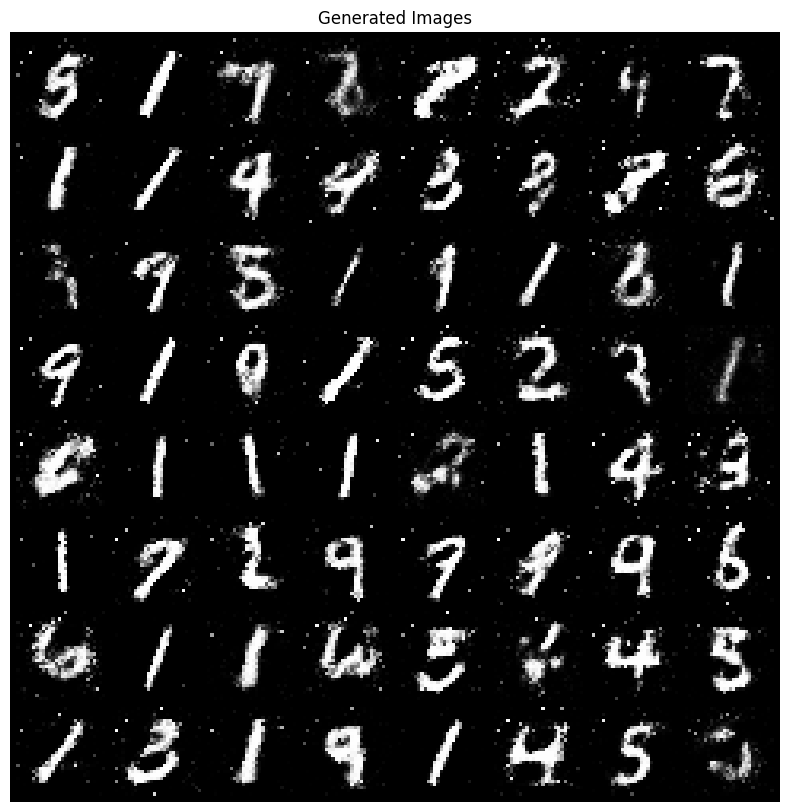

In [5]:
import torch
import torchvision.utils as vutils
import matplotlib.pyplot as plt
import numpy as np

# Load generator weights
generator.load_state_dict(torch.load('generator.pth'))
generator.eval()  # Set the generator to evaluation mode

# Generate synthetic images
noise = torch.randn(batch_size, latent_size)
fake_images = generator(noise)

# Reshape the images to the correct format
fake_images = fake_images.view(batch_size, 1, 28, 28)

# Display the generated images
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.title("Generated Images")
plt.imshow(np.transpose(vutils.make_grid(fake_images[:64], padding=2, normalize=True).cpu(), (1, 2, 0)))
plt.show()

These lines load the pre-trained weights of the generator model from a file named 'generator.pth'. The generator.eval() line sets the generator model to evaluation mode, which is required for generating new images.

A random noise vector of size (batch_size, latent_size) is generated using torch.randn. This noise vector is then passed through the generator model generator(noise) to generate a batch of fake or synthetic images.

The generated fake images are reshaped to the correct format expected by the visualization code. In this case, the images are reshaped to have dimensions (batch_size, 1, 28, 28), where 1 represents the number of channels (grayscale images), and 28 x 28 is the size of each image.

